In [1]:
import pandas as pd
df = pd.read_csv('ts_data.csv')

In [2]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
## Cleaning up the data
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [5]:
df.isnull().sum()

Month    1
Sales    2
dtype: int64

In [6]:
df = df.dropna(axis=0)

In [7]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [8]:
df.set_index('Month',inplace=True)

In [9]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [10]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


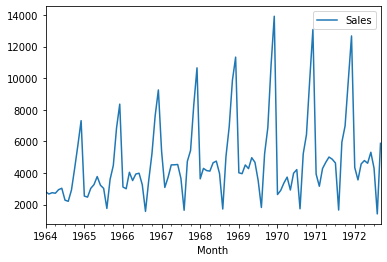

In [11]:
df.plot()

In [12]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [14]:
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [15]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Wed, 26 Aug 2020   AIC                           1910.251
Time:                        07:32:49   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7846     12.405      1.837      0.069      -1.529      47.098
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

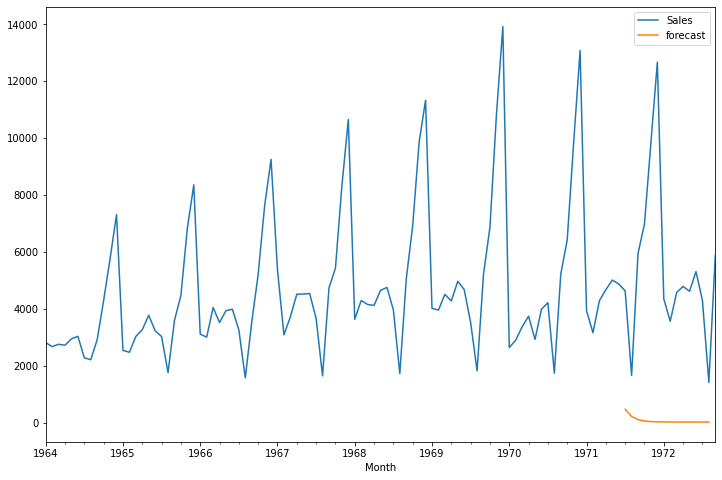

In [16]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [17]:
import statsmodels.api as sm

model=sm.tsa.statespace.SARIMAX(df['Sales'],seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [28]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  105
Model:             SARIMAX(1, 0, 0)x(1, 1, 1, 12)   Log Likelihood                -749.781
Date:                            Wed, 26 Aug 2020   AIC                           1507.562
Time:                                    07:43:59   BIC                           1517.693
Sample:                                01-01-1964   HQIC                          1511.653
                                     - 09-01-1972                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3030      0.071      4.283      0.000       0.164       0.442
ar.S.L12      -0.5287      0.491     -1.078      0.281      -1.490       0.433
ma.S.L12       0.4202      0.519      0.810      0.418      -0.596       1.437
sigma2      5.657e+05   6.91e+04      8.187      0.000     4.3e+05    7.01e+05
===================================================================================
Ljung-Box (Q):                       37.04   Jarque-Bera (JB):                10.03
Prob(Q):                              0.60   Prob(JB):                         0.01
Heteroskedasticity (H):               0.88   Skew:                            -0.24
Prob(H) (two-sided):                  0.72   Kurtosis:                         4.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

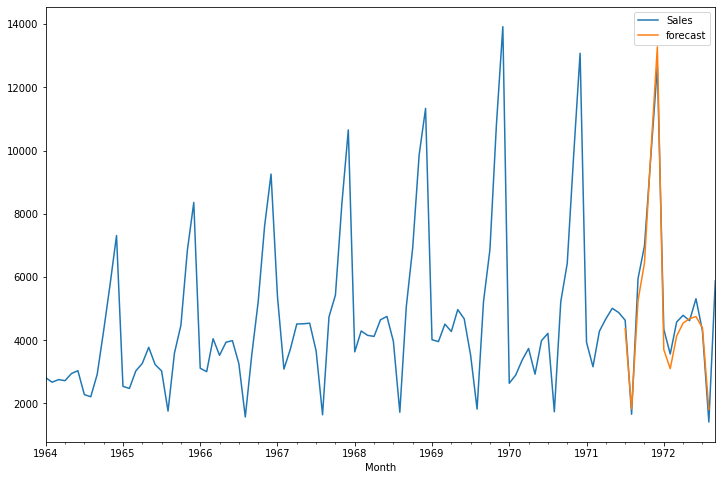

In [18]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [19]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [20]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [21]:
future_datest_df.tail()

,Sales,forecast
1974-04-01,NaN,NaN
1974-05-01,NaN,NaN
1974-06-01,NaN,NaN
1974-07-01,NaN,NaN
1974-08-01,NaN,NaN


In [22]:
future_df=pd.concat([df,future_datest_df])

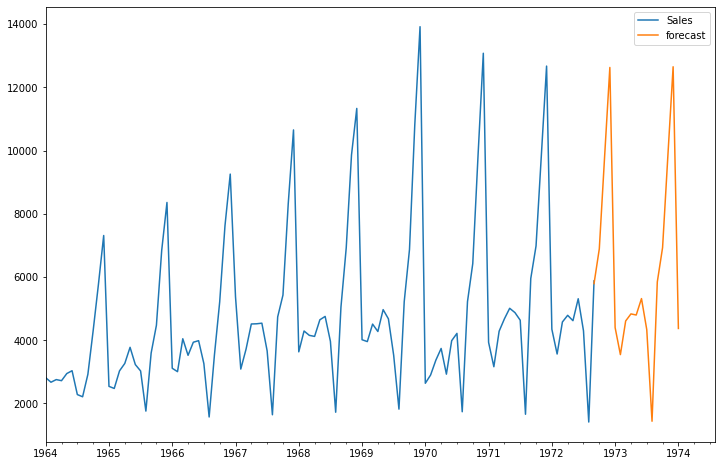

In [23]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8))

In [29]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(results, open(filename, 'wb'))

In [30]:
loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, Y_test)
#print(result)

In [31]:
loaded_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  105
Model:             SARIMAX(1, 0, 0)x(1, 1, 1, 12)   Log Likelihood                -749.781
Date:                            Wed, 26 Aug 2020   AIC                           1507.562
Time:                                    07:44:26   BIC                           1517.693
Sample:                                01-01-1964   HQIC                          1511.653
                                     - 09-01-1972                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3030      0.071      4.283      0.000       0.164       0.442
ar.S.L12      -0.5287      0.491     -1.078      0.281      -1.490       0.433
ma.S.L12       0.4202      0.519      0.810      0.418      -0.596       1.437
sigma2      5.657e+05   6.91e+04      8.187      0.000     4.3e+05    7.01e+05
===================================================================================
Ljung-Box (Q):                       37.04   Jarque-Bera (JB):                10.03
Prob(Q):                              0.60   Prob(JB):                         0.01
Heteroskedasticity (H):               0.88   Skew:                            -0.24
Prob(H) (two-sided):                  0.72   Kurtosis:                         4.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""